In [ ]:
# en este proyecto lo que se busca es el mejor modelo para la predicción del precio del aguacate. Para ello se cuenta con una 
# data que se analizará y de la cual se escogerán las features que realmente son importantes para la variación del precio.

# veragePrice - es nuestro target, el precio medio por aguacate

# las columnas que tiene el data son:

# 4046 - es el número de aguacates vendidos de la clase concreta 4046

# 4225 - es el número de aguacates vendidos de la clase concreta 4225

# 4770 - es el número de aguacates vendidos de la clase concreta 770

# Small Bags es el número de bolsas totales vendidas que están llenas del aguacate de tipo 4046

# Large Bags es el número de bolsas totales vendidas que están llenas del aguacate de tipo 4225

# XLarge Bags es el número de bolsas totales vendidas que están llenas del aguacate de tipo 4770

# Date - fecha de las tomas de los precios

# type - convencional u organico

# year - año

# Region - zona de EEUU donde se ha tomado el precio

In [14]:
# Comienzo abriendo los datos y haciendo un EDA necesario para discriminar las columnas con las que me voy a quedar.

In [15]:
import pandas as pd
import os

path_avocado = os.path.join("note_books", "avocado.csv")
df = pd.read_csv(path_avocado).drop('Unnamed: 0', axis=1)

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
4046 - Total number of avocados with PLU 4046 sold (Small Bags)

4225 - Total number of avocados with PLU 4225 sold (Large Bags)

4770 - Total number of avocados with PLU 4770 sold (XLarge Bags)

# 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


<AxesSubplot:>

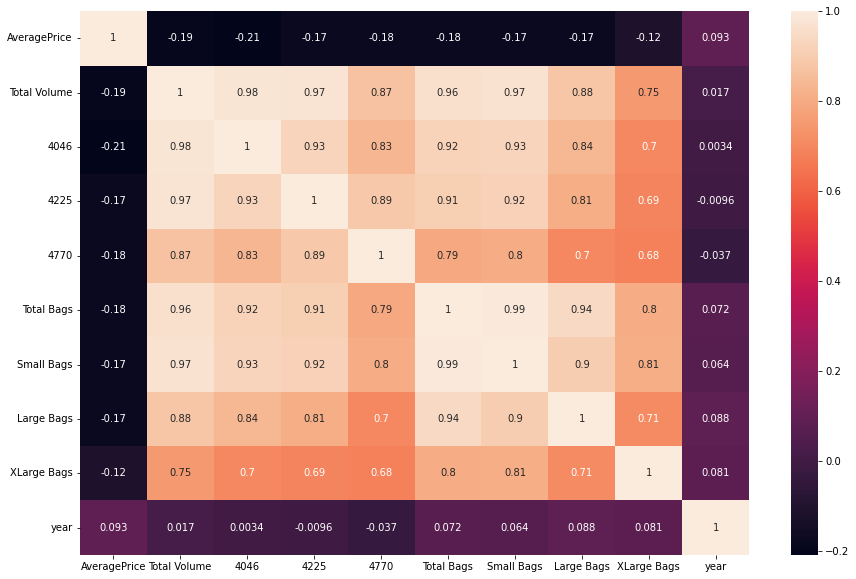

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot=True)

In [19]:
# Analizo las columnas y la correlación entre ellas, incluyendo la columna de Date, 
# que la puedo poner de tipo datetime. También coloco la columna region como una columna numérica, en base a la extensión 
# de cada territorio. También convierto en numérica la columna binaria de type

# finalmente me quedo con la matriz siguiente

In [20]:
diccionario= {'Albany': 21.8,
'Sacramento'              :257,
'Northeast':       0,
'NorthernNewEngland' :   162362,
'Orlando'    : 261.5,
'Philadelphia'    : 369.3,
'PhoenixTucson'   : 1341.48 + 	588.02,
'Pittsburgh'       :      151.1,
'Plains':              34.4,
'Portland'        :     347.9,
'RaleighGreensboro':      299.3+27.2 ,
'RichmondNorfolk': 155.20 + 137.98  ,        
'Roanoke'          :      110.99,
'SanDiego':            844.02,
'Atlanta'         :    350.48, 
'SanFrancisco'    :    121,
'Seattle':            2172,
'SouthCarolina':         82931,
'SouthCentral'     : 0,
'Southeast':        0,
'Spokane'  :         178.09,
'StLouis'   : 159.85,
'Syracuse'  :     64.71 ,
'Tampa'     :   295.30 ,
'TotalUS'   :    0,
'West':      0,
'NewYork':        122057,
'NewOrleansMobile'  : 361.26+ 438.80,
'Nashville'    :  1305.4,
'Midsouth':      0,
'BaltimoreWashington':  209.65 + 158.1,
'Boise':    216.96,
'Boston':    125.20,
'BuffaloRochester':     92.63+104.58, 
'California':     403932,
'Charlotte':     795.80,
'Chicago'             : 589.82,
'CincinnatiDayton': 201.59+ 143.47,
'Columbus' : 570.08,
'DallasFtWorth':   879.56 + 899.44,
'Denver':      396.463,
'Detroit':     359.31,
'GrandRapids':    115.97,
'GreatLakes' :  0,
'HarrisburgScranton':    21.03+ 65.55,
'HartfordSpringfield':    338,
'Houston':       1552.92,
'Indianapolis':        936,
'Jacksonville':        115.2,
'LasVegas':       352,
'LosAngeles':     1214.9, 
'Louisville': 171.7,
'MiamiFtLauderdale' :  0,
'WestTexNewMexico':   0
    
}
df['Region'] = df['region'].map(lambda region_label : diccionario[region_label])

In [21]:
df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")
df = df.sort_values(by= 'Datetime')
df = df.drop(columns=[ 'Small Bags'])
df = df.drop(columns=[ 'Date'])
df = df.drop(columns=['4225', '4770', 'Total Volume', 'Total Bags', 'region', 'year'])

In [23]:
df['type'] = df['type'].apply(lambda x: 1 if x== 'organic' else 0)

In [24]:
df

,AveragePrice,4046,Large Bags,XLarge Bags,type,Region,Datetime
11569,1.75,9307.34,537.36,0.00,1,0.00,2015-01-04
9593,1.49,1189.35,0.00,0.00,1,589.82,2015-01-04
10009,1.68,161.68,0.00,0.00,1,86.58,2015-01-04
1819,1.52,3013.04,3660.38,0.00,0,151.10,2015-01-04
9333,1.64,1.27,187.68,0.00,1,216.96,2015-01-04
...,...,...,...,...,...,...,...
8574,1.36,142681.06,22467.04,1362.59,0,589.82,2018-03-25
9018,0.70,3999735.71,546409.74,69152.63,0,0.00,2018-03-25
18141,1.42,29253.30,20111.10,0.00,1,0.00,2018-03-25
17673,1.70,29644.09,207.08,0.00,1,403932.00,2018-03-25


In [ ]:
# miro ahora las dos columnas que son discretas y que he categorizado de manera numérica si sus valores están
# medianamente equilibrados, esto nos interesa saberlo para posible tratamiento de los datos posteriores

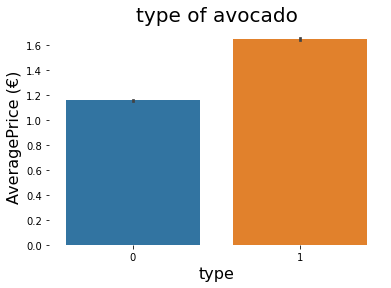

In [25]:
plt.title("Avg.Price of Avocado by type")
sns.barplot(data= df, y="AveragePrice", x="type")
plt.ylabel("AveragePrice (€)", size = 16)
plt.xlabel("type", size = 16)
plt.title('type of avocado', size=20)
plt.box(on=None)

In [26]:
df['Region'].value_counts()

0.000         3039
936.000        338
844.020        338
367.750        338
110.990        338
293.180        338
171.700        338
2172.000       338
345.060        338
122057.000     338
800.060        338
115.200        338
589.820        338
570.080        338
359.310        338
369.300        338
1929.500       338
1305.400       338
347.900        338
338.000        338
295.300        338
261.500        338
396.463        338
115.970        338
162362.000     338
197.210        338
86.580         338
151.100        338
216.960        338
1214.900       338
352.000        338
350.480        338
1779.000       338
34.400         338
159.850        338
64.710         338
257.000        338
125.200        338
795.800        338
178.090        338
21.800         338
1552.920       338
82931.000      338
121.000        338
326.500        338
403932.000     338
Name: Region, dtype: int64

In [ ]:
# concluímos que estas dos columnas tienen los datos muy bien distribuidos, no siendo necesaria una técnica de ponderación

In [ ]:
# de la matriz df que nos queda, se han estudiado los outliers y en una de las prácticas se han realizado todos los modelos sin ellos.
# también se ha estudiado la 'normalidad' de cada columna con el índice de Shapiro, para saber si es conveniente ajustar los datos 
# de manera logarítmica, y mejorar la 'normalidad' para aplicar con mayor coherencia los modelos de machine learning.
# En este notebook de resumen omito todos estos procesos. Indico únicamente que ni ajustando los datos logarítmicamente, ni eliminando
# los outliers alcanzamos mejores métricas en los modelos de ML.

In [ ]:
#------------------------------------------#

In [ ]:
# Pasamos al análisis de los modelos

In [28]:
path_precision = os.path.join("data", "precision.csv")
precision = pd.read_csv(path_precision).drop('Unnamed: 0', axis=1)

In [29]:
precision

,Model,R2 score,MAE
0,KNeighborsRegressor,0.46,0.22
1,GradientBoostingRegressor,0.61,0.19
2,KNeighborsRegressor,0.46,0.22
3,ExtraTreesRegressor,0.64,0.18
4,RandomForestRegressor,0.71,0.16
5,DecisionTreeRegressor,0.46,0.21
6,LinearRegression,0.40,0.24
7,Lasso,-0.00,0.33
8,Ridge,0.40,0.24


In [ ]:
# de todos estos modelos, el que mejor se comporta es el Random Forest, tiene el máximo score y el mínimo MAE.
# por lo tanto se estudia de manera más profunda el Modelo de Random Fores, mediante un GridShare y de manera manual,
# intentando mejorar esa precisión y variando los hiperparámetros, para evitar el 'sobre-ajuste', y en ninguno de los casos
# se consigue una mejora substancial. 

In [ ]:
# Los hiperparámetros del modelo Random Forest Regressor son:
# n_estimatorsint, default=100
# criterion = squared_error
# max_depthint, default=None
# min_samples_splitint =2
# min_samples_leafint =1
# min_weight_fraction_leaffloat =0.0
# max_features =1.0
# bootstrapbool, default=True
# min_impurity_decreasefloat, default=0.0
# max_leaf_nodesint, default=None
# random_stateint = 7

In [31]:
# Tambien es importante comentar que se ha realizado un ajuste de tipo TimeSeries, concretamente el modelo Arima,


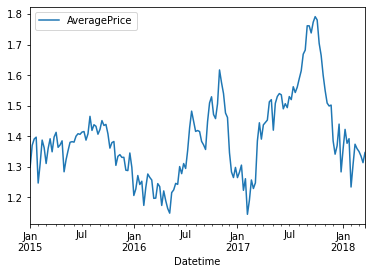

In [33]:
import IPython.display as display
from PIL import Image
display.display(Image.open('timeseries.png'))

In [ ]:
# aquí podemos ver que la gráfica no tiene tendencia ( comprobado por el índice de adfuller), tampoco posee seasonality,
# como se analiza en el notebook dedicado a tal análisis.
# los resultados obtenidos son de mayor error y de menor precision que en el caso del Random Forest

In [ ]:
# Con un score negativo no es un modelo útil para cualquier prediccion en el tiempo